La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y
cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de
nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes
están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas,
donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.

1. Instale el ambiente de Tensorflow
2. Carga de la data
3. Descripción de la base de datos

4. Configuración de la red neuronal
5. Compilación de la red neuronal
6. Entrenamiento de la red
7. Predicción y conclusión.

In [85]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [86]:
#cargamos data
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [87]:
class_names = ["Camiseta", "Pantalón", "Suéter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Botines"]

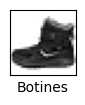

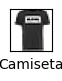

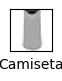

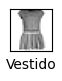

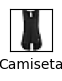

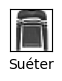

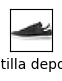

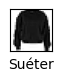

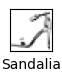

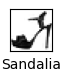

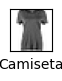

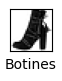

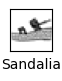

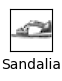

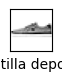

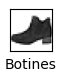

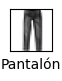

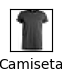

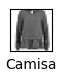

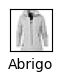

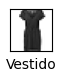

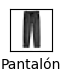

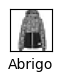

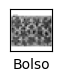

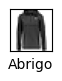

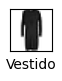

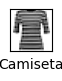

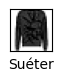

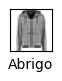

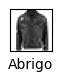

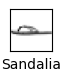

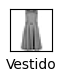

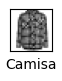

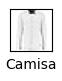

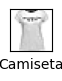

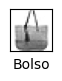

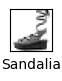

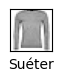

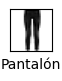

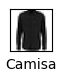

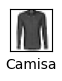

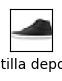

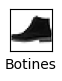

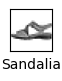

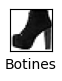

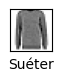

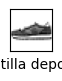

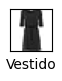

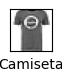

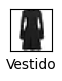

In [88]:
#Exploramos todas las categorías de la data.
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [89]:
#reescalamos a 255
train_images = train_images / 255
test_images = test_images / 255

In [90]:
#modelo de red neuronal
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(150, activation=tf.nn.relu),keras.layers.Dense(10, activation=tf.nn.softmax)])

In [91]:
#complilacion de red neuronal
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               117750    
                                                                 
 dense_7 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [93]:
#entrenando red neuronal
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4943 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3691 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3333 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3099 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2914 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2775 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2634 - accuracy: 0.9027
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2537 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2452 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.235

In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8822
Test accuracy: 0.8822000026702881


In [111]:
predictions = model.predict(test_images)#Se guardan las imagenes de prueba en este array
img_predict = predictions[48]

313/313 [==============================] - 1s 3ms/step


In [112]:
img_predict

array([4.0491647e-03, 3.6521541e-07, 5.5087495e-01, 3.4678397e-03,
       7.2575197e-02, 1.5698990e-05, 3.6898327e-01, 8.4366930e-06,
       2.3299253e-05, 1.6344251e-06], dtype=float32)

In [113]:
np.argmax(img_predict)

2

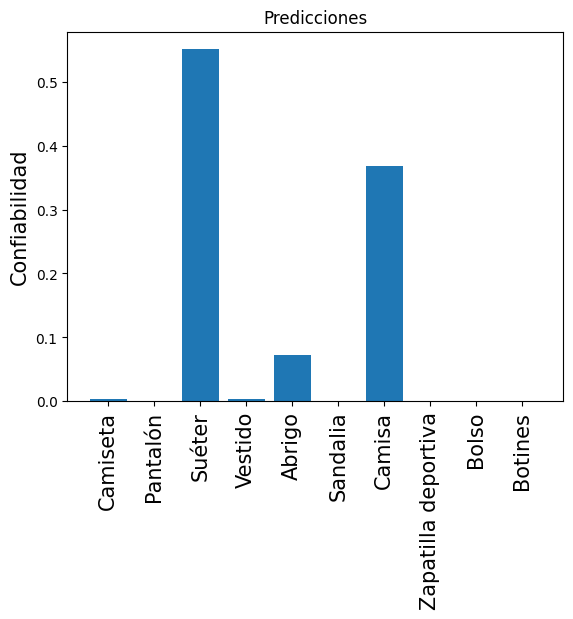

In [114]:
index = np.arange(len(class_names))
plt.bar(index, img_predict)
plt.ylabel("Confiabilidad", fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title("Predicciones")
plt.show()

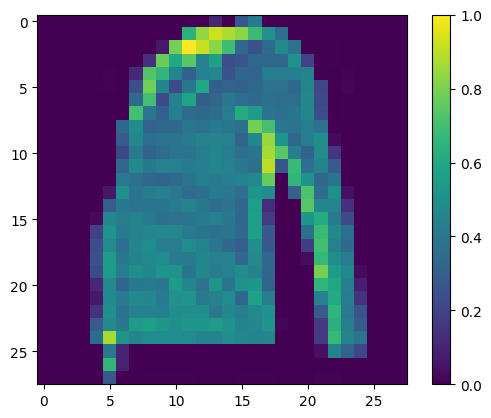

In [115]:
plt.figure()
plt.imshow(test_images[48])
plt.colorbar()
plt.grid(False)
plt.show()

Si bien la exactitud del model es de $88\%$ tiene algunas imagenes que las repoduce muy mal o otras como la mostrada anteriormente que nos da una confiabilidad muy igual entre dos objetos, generalmente pasa cuando estas prendas cubren la misma parte del cuerpo como por ejemplo un sueter o una camisa 